In [31]:
using Luxor
using Colors
using Plots
using IterTools
using DataFrames
using OpenStreetMapX
using LightOSM
using KernelDensity
using Parsers
using Downloads
using OSMToolset
include("kernel_density.jl")
include("distance.jl")
include("prepare_data.jl")
include("analyse.jl")
include("plots.jl")
include("transform.jl")
include("tile_regression.jl")

generate_tiles (generic function with 1 method)

In [29]:
city = "Warszawa"
admin_level = "6"
search_area = 1000
attr = :education
wilderness_distance = 300
shape = "rectangle"
calculate_percent = true
num_of_points = 30
distance_sectors = 200.0
scrape_config = "poi_config_test.csv"
num_of_sectors = 100
ncols=10
nrows=10

10

In [20]:
points_heat,attr_heat,bounds_heat = calculate_attractiveness_for_city_points(                                      
                    city, #city_name
                    admin_level, #admin_level
                    search_area, #search_area
                    attr, #attr
                    wilderness_distance, #wilderness_distance
                    shape, #shap;
                    distance_sectors=300,
                    rectangle_boundaries= get_city_bounds(city,admin_level),
                    #calculate_percent = calculate_percent,
                    #num_of_points = num_of_points,
                    scrape_config = scrape_config,
                    in_admin_bounds=false)
attr_heat = matrix_log_scaling(attr_heat)


┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


96×101 Matrix{Float64}:
 0.0      0.0      0.0      0.0      0.0      …  1.74269  0.0  0.0  0.0  0.0
 0.0      0.0      0.0      0.0      0.0         1.7806   0.0  0.0  0.0  0.0
 0.0      0.0      0.0      0.0      0.0         1.77285  0.0  0.0  0.0  0.0
 0.0      0.0      0.0      0.0      0.0         1.72122  0.0  0.0  0.0  0.0
 0.0      0.0      0.0      0.0      0.0         1.63376  0.0  0.0  0.0  0.0
 0.0      0.0      0.0      0.0      0.0      …  0.0      0.0  0.0  0.0  0.0
 1.35983  1.39626  1.68081  1.73929  1.76756     0.0      0.0  0.0  0.0  0.0
 1.41634  1.46155  1.76928  1.83013  1.86374     0.0      0.0  0.0  0.0  0.0
 1.45636  1.51446  1.83154  1.8873   1.91868     0.0      0.0  0.0  0.0  0.0
 1.47096  1.53773  1.86115  1.89454  1.90855     0.0      0.0  0.0  0.0  0.0
 ⋮                                            ⋱                          ⋮
 1.35996  2.25505  2.38473  2.48668  2.59804     2.2312   0.0  0.0  0.0  0.0
 1.42071  2.34897  2.52748  2.64456  2.76307     1.739

In [21]:
data = prepare_city_map(city, #city_name
            admin_level, #admin_level
            search_area, #search_area
            attr, #attr
            wilderness_distance, #wilderness_distance
            shape, #shap;
            distance_sectors=300,
            rectangle_boundaries= get_city_bounds(city,admin_level),
            #calculate_percent = calculate_percent,
            #num_of_points = num_of_points,
            scrape_config = scrape_config,
            in_admin_bounds=false)

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


(Union{Nothing, ENU}[ENU(-10624.369201110818, -14910.930176718666, 0.0) ENU(-10624.369201110818, -14609.944152040167, 0.0) … ENU(-10624.369201110818, 14886.68626645273, 0.0) ENU(Inf, Inf, Inf); ENU(-10322.945755005083, -14910.930176718666, 0.0) ENU(-10322.945755005083, -14609.944152040167, 0.0) … ENU(-10322.945755005083, 14886.68626645273, 0.0) ENU(-10322.945755005083, 15187.67229113123, 0.0); … ; ENU(17709.434732828264, -14910.930176718666, 0.0) ENU(17709.434732828264, -14609.944152040167, 0.0) … ENU(17709.434732828264, 14886.68626645273, 0.0) ENU(17709.434732828264, 15187.67229113123, 0.0); ENU(18010.858178934, -14910.930176718666, 0.0) ENU(18010.858178934, -14609.944152040167, 0.0) … ENU(18010.858178934, 14886.68626645273, 0.0) ENU(18010.858178934, 15187.67229113123, 0.0)], LLA(52.2319581, 21.0067249, 0.0), AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(RTree{Float64, 2, SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMeta

In [22]:
city_centre = data[2]

LLA(52.2319581, 21.0067249, 0.0)

In [23]:
#parsed = OpenStreetMapX.parseOSM("$city.osm")

In [24]:
road_types = ["motorway", "trunk", "primary", "secondary", 
                "tertiary", "residential", "service", "living_street",
                "motorway_link", "trunk_link", "primary_link", "secondary_link", 
                "tertiary_link"]    

13-element Vector{String}:
 "motorway"
 "trunk"
 "primary"
 "secondary"
 "tertiary"
 "residential"
 "service"
 "living_street"
 "motorway_link"
 "trunk_link"
 "primary_link"
 "secondary_link"
 "tertiary_link"

In [32]:
tiles = generate_tiles(city,admin_level,ncols,nrows)

100×1 Matrix{OSMToolset.Bounds}:
 OSMToolset.Bounds(52.0978497, 20.8516882, 52.12488004, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.12488004, 20.8516882, 52.15191038, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.15191038, 20.8516882, 52.17894072, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.17894072, 20.8516882, 52.205971059999996, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.205971059999996, 20.8516882, 52.2330014, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.2330014, 20.8516882, 52.26003174, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.26003174, 20.8516882, 52.28706208, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.28706208, 20.8516882, 52.31409242, 20.8936345, 0.02703034000000031, 0.04194629999999968)
 OSMToolset.Bounds(52.31409242, 20.8516882, 52.34112276, 20.8936345,

In [33]:
tls,xs,ys = calc_all_tiles_length(city,city_centre,road_types,tiles,10,10)

(Any[83296.56466449994, 96847.65172622201, 76617.75055025703, 168061.4958243528, 108017.20018400848, 65385.45656640825, 55875.98990889213, 31134.4284193556, 68263.28143562484, 91008.44624982063  …  119730.06295319404, 75755.7989083601, 32519.3675103083, 33868.90006203496, 109513.54280859939, 55250.77892092045, 3517.2494940809597, 3386.089969496419, 48142.2908671972, 96807.71032390042], [-10624.369201110818 -7745.1886121103125 -7745.1886121103125 -10624.369201110818; -10617.946330069753 -7740.501751537733 -7740.501751537733 -10617.946330069753; … ; 15172.279115350853 18021.84937529026 18021.84937529026 15172.279115350853; 15163.03486653075 18010.858178934 18010.858178934 15163.03486653075], [-14910.930176718666 -14910.930176718666 -11908.605766341672 -11908.605766341672; -11903.292177257947 -11903.292177257947 -8900.948034651703 -8900.948034651703; … ; 9162.576574461607 9162.576574461607 12179.92301291199 12179.92301291199; 12170.320576334692 12170.320576334692 15187.67229113123 15187.6

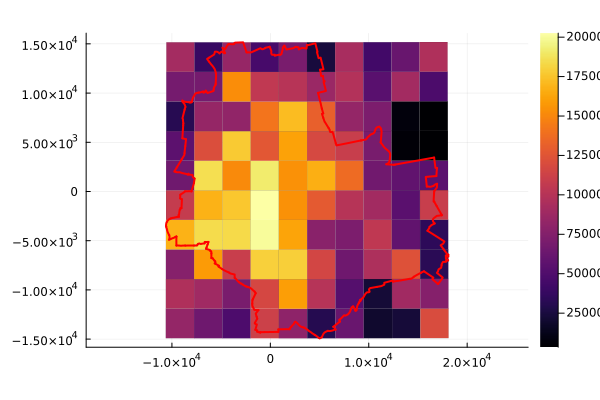

In [39]:
tile_plot(data[5],tls,xs,ys)

In [34]:
extract_tiles(city,ncols,nrows,"tiles/")
bounds, density, fl_xs, fl_ys = get_tile_values_from_files(city,ncols,nrows,"tiles/",road_types)

(1872×5 DataFrame
  Row │ adminname  wayid       nodes        x        y       
      │ String     Int64       Int64        Float64  Float64 
──────┼──────────────────────────────────────────────────────
    1 │ Warszawa    189250475  10245691137  5243.22  8396.65
    2 │ Warszawa    189250475   8880938278  5286.19  8241.41
    3 │ Warszawa    189250475   8880938277  5313.13  8147.37
    4 │ Warszawa    189250475   8880938274  5331.63  8083.05
    5 │ Warszawa    189250475   8880938276  5371.68  7941.3
    6 │ Warszawa    189250475   1609040007  5374.36  7935.48
    7 │ Warszawa   1120221170   1609040062  5243.22  8396.65
    8 │ Warszawa   1120221170  10245691137  5231.59  8438.68
  ⋮   │     ⋮          ⋮            ⋮          ⋮        ⋮
 1866 │ Warszawa   1120833209   5035791121  5378.36  7481.37
 1867 │ Warszawa   1120833209   4453572111  5374.52  7494.34
 1868 │ Warszawa    560064934   1609040007  5374.52  7494.34
 1869 │ Warszawa    560064934   1609040004  5366.7   7520.14
 1870 │

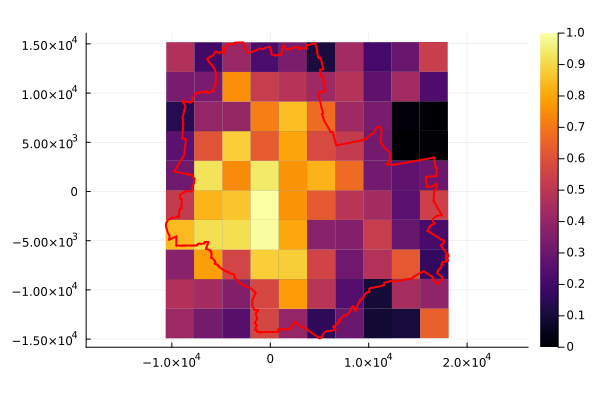

In [35]:
tile_plot(bounds, density, fl_xs, fl_ys)

In [36]:
attr_xs,attr_ys, tile_attrs = agregate_values_in_tiles(points_heat,attr_heat,tiles,city_centre)

([-10624.369201110818 -7745.1886121103125 -7745.1886121103125 -10624.369201110818; -10617.946330069753 -7740.501751537733 -7740.501751537733 -10617.946330069753; … ; 15172.279115350853 18021.84937529026 18021.84937529026 15172.279115350853; 15163.03486653075 18010.858178934 18010.858178934 15163.03486653075], [-14910.930176718666 -14910.930176718666 -11908.605766341672 -11908.605766341672; -11903.292177257947 -11903.292177257947 -8900.948034651703 -8900.948034651703; … ; 9162.576574461607 9162.576574461607 12179.92301291199 12179.92301291199; 12170.320576334692 12170.320576334692 15187.67229113123 15187.67229113123], Any[0.7828113623350478, 0.04990935955980128, 1.6509182573816565, 3.590654168450354, 1.7688953760036703, 1.9053872235018785, 0.7142459852755481, 1.1662686896416044, 0.8630914196828839, 1.196716534097766  …  3.0040884375325128, 1.8527420243650634, 0.5937045603750254, 1.0141599807469075, 2.3602877087679732, 2.481493524551441, 1.3159446492679086, 0.5915204640682282, 1.55685892

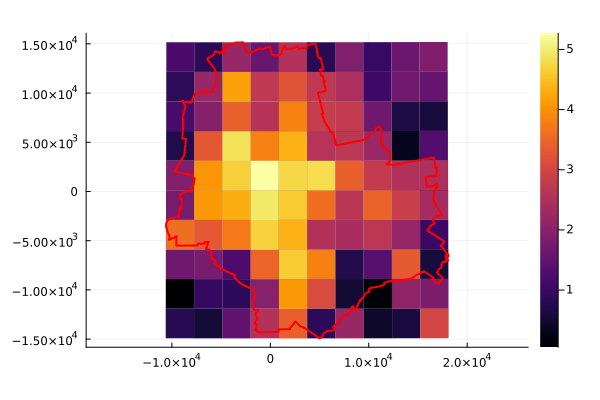

In [40]:
tile_plot(bounds, tile_attrs, attr_xs, attr_ys)